In [23]:
import torch

rep_path = '/workspace/hackathon_matfreeze/ft_saved_models/bandgap_finetuning_rep_extract/representations/train/representations_epoch1.pt'
reps = torch.load(rep_path, weights_only=False)
crystal_embeddings_pretrain = reps['crystal'].numpy()  # Shape: (N, 128)

print(f"Saved {crystal_embeddings.shape[0]} samples")

Saved 70 samples


In [21]:
rep_path = '/workspace/hackathon_matfreeze/ft_saved_models/bandgap_finetuning_rep_extract/representations/train/representations_epoch200.pt'
reps = torch.load(rep_path, weights_only=False)
crystal_embeddings_ft_full = reps['crystal'].numpy()  # Shape: (N, 128)
print(f"Saved {crystal_embeddings.shape[0]} samples")

Saved 70 samples


In [18]:
print(crystal_embeddings[0].shape)

torch.Size([128])


In [34]:
data_path = "/workspace/hackathon_matfreeze/example_data/snumat_data/bandgap.pt"
reps = torch.load(data_path, weights_only=False)
print(len(reps))
for key, value in reps.items():
    if isinstance(value, torch.Tensor):
        print(f"  {key}: {value.shape}")
    else:
        print(f"  {key}: {type(value)}")
        

100
  SM-1888: <class 'float'>
  SM-13307: <class 'float'>
  SM-2980: <class 'float'>
  SM-3507: <class 'float'>
  SM-16973: <class 'float'>
  SM-16974: <class 'float'>
  SM-16975: <class 'float'>
  SM-17801: <class 'float'>
  SM-14907: <class 'float'>
  SM-16976: <class 'float'>
  SM-10681: <class 'float'>
  SM-10682: <class 'float'>
  SM-10683: <class 'float'>
  SM-10684: <class 'float'>
  SM-20105: <class 'float'>
  SM-16977: <class 'float'>
  SM-15764: <class 'float'>
  SM-10685: <class 'float'>
  SM-16979: <class 'float'>
  SM-16980: <class 'float'>
  SM-16981: <class 'float'>
  SM-16982: <class 'float'>
  SM-14864: <class 'float'>
  SM-13308: <class 'float'>
  SM-10686: <class 'float'>
  SM-10687: <class 'float'>
  SM-17803: <class 'float'>
  SM-10689: <class 'float'>
  SM-2125: <class 'float'>
  SM-16983: <class 'float'>
  SM-2126: <class 'float'>
  SM-10690: <class 'float'>
  SM-4883: <class 'float'>
  SM-10691: <class 'float'>
  SM-10692: <class 'float'>
  SM-10693: <class 'fl

In [ ]:
print

/opt/venv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


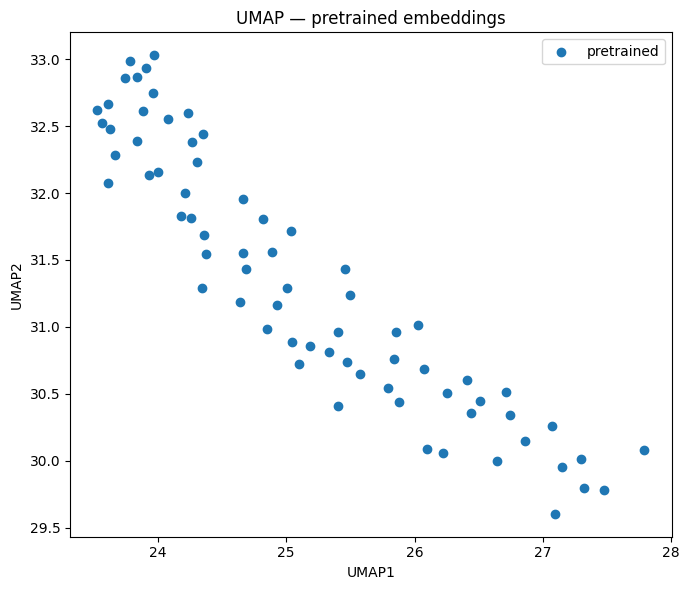

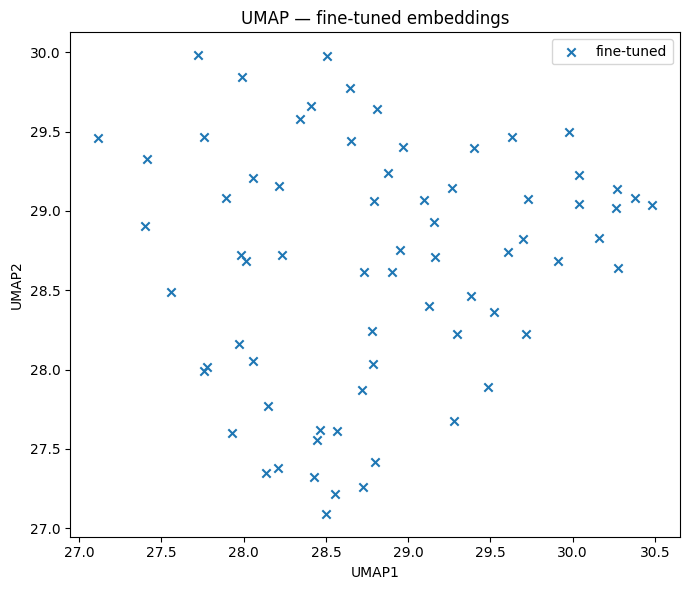

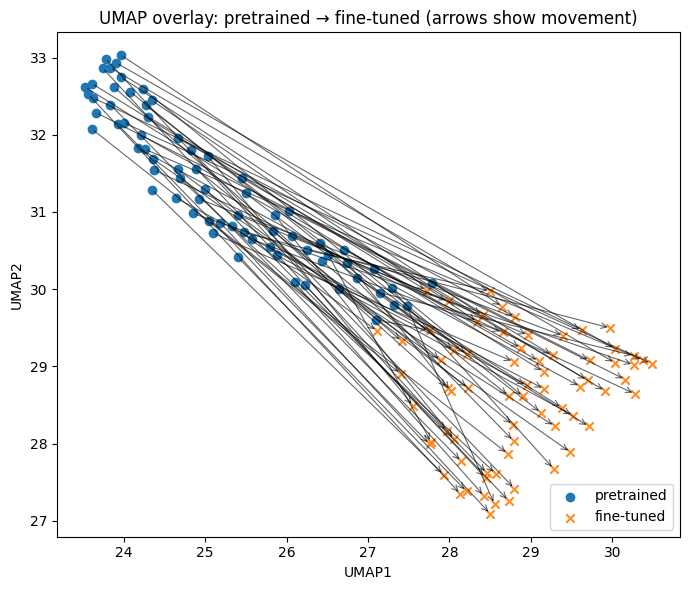

In [22]:
"""
UMAP visualization for comparing pretrained vs fine-tuned embeddings.

Usage:
    1. Install: pip install umap-learn
    2. Replace the demo `pre_embeds` and `fine_embeds` with your numpy arrays:
         pre_embeds  = np.asarray(...)   # shape (n_samples, dim)
         fine_embeds = np.asarray(...)   # same shape
    3. Run the script. It creates three plots:
         - UMAP of pretrained embeddings
         - UMAP of fine-tuned embeddings
         - Joint UMAP + arrows showing how each sample moved
"""

import numpy as np
import matplotlib.pyplot as plt
import umap

def visualize_embeddings_umap(pre_embeds, fine_embeds,
                              n_neighbors=15, min_dist=0.1, n_components=2, random_state=42,
                              max_arrows=200, arrow_alpha=0.6, figsize=(7, 6)):
    assert isinstance(pre_embeds, np.ndarray) and isinstance(fine_embeds, np.ndarray), \
        "pre_embeds and fine_embeds must be numpy arrays"
    assert pre_embeds.shape == fine_embeds.shape, "Both arrays must have the same shape (n_samples, dim)"
    n_samples = pre_embeds.shape[0]

    # Fit UMAP on the concatenation so both sets are embedded in the same 2D space
    reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist,
                        n_components=n_components, random_state=random_state)
    stacked = np.vstack([pre_embeds, fine_embeds])
    embedding = reducer.fit_transform(stacked)
    emb_pre = embedding[:n_samples]
    emb_fine = embedding[n_samples:]

    # Plot 1: pretrained
    plt.figure(figsize=figsize)
    plt.scatter(emb_pre[:, 0], emb_pre[:, 1], marker='o', label='pretrained')
    plt.title("UMAP — pretrained embeddings")
    plt.xlabel("UMAP1")
    plt.ylabel("UMAP2")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot 2: fine tuned
    plt.figure(figsize=figsize)
    plt.scatter(emb_fine[:, 0], emb_fine[:, 1], marker='x', label='fine-tuned')
    plt.title("UMAP — fine-tuned embeddings")
    plt.xlabel("UMAP1")
    plt.ylabel("UMAP2")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot 3: overlay with arrows showing movement for each matched sample
    plt.figure(figsize=figsize)
    plt.scatter(emb_pre[:, 0], emb_pre[:, 1], marker='o', label='pretrained')
    plt.scatter(emb_fine[:, 0], emb_fine[:, 1], marker='x', label='fine-tuned', alpha=0.9)
    plt.title("UMAP overlay: pretrained → fine-tuned (arrows show movement)")
    plt.xlabel("UMAP1")
    plt.ylabel("UMAP2")

    # Subsample arrows if too many points
    if n_samples > max_arrows:
        idxs = np.random.RandomState(random_state).choice(n_samples, size=max_arrows, replace=False)
    else:
        idxs = np.arange(n_samples)

    for i in idxs:
        x0, y0 = emb_pre[i]
        x1, y1 = emb_fine[i]
        # annotate with default arrowprops (no explicit color set)
        plt.annotate("", xy=(x1, y1), xytext=(x0, y0),
                     arrowprops=dict(arrowstyle="->", alpha=arrow_alpha, linewidth=0.8))

    plt.legend()
    plt.tight_layout()
    plt.show()


# ----------------------
# Demo: synthetic embeddings (remove/replace with your data)
# ----------------------
if __name__ == "__main__":
    rng = np.random.RandomState(0)
    n = 500
    dim = 128
    # centers = rng.normal(size=(5, dim)) * 4.0
    # pre = np.vstack([centers[i % 5] + rng.normal(scale=1.0, size=(n // 5, dim)) for i in range(5)])
    # pre = pre[:n]
    # noise = rng.normal(scale=0.6, size=pre.shape)
    # directional_shift = (rng.normal(size=(n, 1)) * 0.5) * (rng.normal(size=(1, dim)))
    # fine = pre + noise + directional_shift

    visualize_embeddings_umap(crystal_embeddings_pretrain, crystal_embeddings_ft_full)

In [14]:
print(crystal_embeddings[2])

tensor([  3.1289,   3.6288, -10.1857, -18.7283,   8.6360,  -7.8067,  -0.1644,
         -0.9567,   5.0543,  -3.7969,  10.1496,   2.6075,   3.7947,   3.1579,
         -7.3263,  15.8206,   4.2066,   1.7307,   5.7242,   1.3210,  -8.6965,
         -1.0435,   6.3991, -10.9512,  15.3328,  -0.8143,   3.9409,   3.4312,
         -7.9574,   2.9063,  -0.4869,  -6.3564,  -8.8585,   7.5835,  -9.0744,
         -9.7969,  -0.2679,   3.7096,   2.2857, -13.6491,  -0.8468,  -8.0672,
         -9.3364, -10.2155,   0.6717,  14.0205,  14.5836,  -5.3535,  -0.0813,
         -4.9497,   5.8254, -10.8778,   2.2487,  -9.8058,  -8.4088,  12.5176,
          7.4776, -14.2796,  11.6682,  -3.9625,  -2.1237, -17.8050, -20.6502,
          1.0188,  -2.5960,  -7.6000,   6.8776,  11.3711,  -7.1239,  -5.2120,
         18.8634, -16.3122,   6.9173,  10.2213,  -1.6741,   4.7317,   8.6018,
          9.2330,  11.6317,  -7.9259,   6.7925,  -7.3194,  -8.2379, -13.5245,
         -4.3523,  -5.2211,   7.2204,  -0.2036,   1.1788,   6.68